# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query URL and test it
# api.openweathermap.org/data/2.5/weather?q=London&appid={API key}
url = 'https://api.openweathermap.org/data/2.5/weather?'
city_query_url = f'{url}q={city}&appid={weather_api_key}&units=Imperial'
response = requests.get(city_query_url).json()
print(response)

{'cod': '404', 'message': 'city not found'}


In [5]:
# Create lists to store data
cityName = []
cityLat = []
cityLng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

#create progress counter
counter = 0

#reset url
city_query_url = f'{url}q={city}&appid={weather_api_key}&units=Imperial'

In [6]:
# Run loop
for idx,city in enumerate(cities):
    if idx%100==0:
        time.sleep(65)
    try:
        city_query_url = f'{url}q={city}&appid={weather_api_key}&units=Imperial'
        response = requests.get(city_query_url).json()
        cityName.append(response['name'])
        cityLat.append(response['coord']['lat'])
        cityLng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['sys']['sunrise'])
        counter += 1
        print(f'Processing Record {counter} of Set 1 | {city}')
    except KeyError:
        print('Missing data, move on to next')
    

Processing Record 1 of Set 1 | punta arenas
Missing data, move on to next
Processing Record 2 of Set 1 | itarema
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | san cristobal
Processing Record 9 of Set 1 | chapais
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | diffa
Processing Record 13 of Set 1 | mareeba
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | deputatskiy
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | yerbogachen
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | lethem
Processing Record 22 of Set 1 | tungor
Processing Record 23 of Set 1 | novobiryusinskiy
Processing Record 24 of

Processing Record 186 of Set 1 | clyde river
Processing Record 187 of Set 1 | mabaruma
Processing Record 188 of Set 1 | adrar
Processing Record 189 of Set 1 | pochutla
Processing Record 190 of Set 1 | tema
Processing Record 191 of Set 1 | miri
Processing Record 192 of Set 1 | shubarkuduk
Processing Record 193 of Set 1 | cherskiy
Processing Record 194 of Set 1 | angoche
Missing data, move on to next
Processing Record 195 of Set 1 | mandalgovi
Processing Record 196 of Set 1 | hambantota
Processing Record 197 of Set 1 | esso
Missing data, move on to next
Missing data, move on to next
Processing Record 198 of Set 1 | aitape
Processing Record 199 of Set 1 | altay
Processing Record 200 of Set 1 | coquimbo
Processing Record 201 of Set 1 | shache
Processing Record 202 of Set 1 | victoria
Processing Record 203 of Set 1 | dikson
Processing Record 204 of Set 1 | ribeira grande
Processing Record 205 of Set 1 | behbahan
Processing Record 206 of Set 1 | alpine
Processing Record 207 of Set 1 | pirovs

Processing Record 366 of Set 1 | tahe
Processing Record 367 of Set 1 | sao filipe
Processing Record 368 of Set 1 | emporia
Processing Record 369 of Set 1 | tokur
Processing Record 370 of Set 1 | sitka
Processing Record 371 of Set 1 | lumphat
Processing Record 372 of Set 1 | honningsvag
Processing Record 373 of Set 1 | craig
Processing Record 374 of Set 1 | stornoway
Processing Record 375 of Set 1 | bilibino
Processing Record 376 of Set 1 | saquena
Processing Record 377 of Set 1 | zaykovo
Processing Record 378 of Set 1 | hualmay
Processing Record 379 of Set 1 | port hedland
Processing Record 380 of Set 1 | ziro
Missing data, move on to next
Processing Record 381 of Set 1 | raahe
Processing Record 382 of Set 1 | kailua
Processing Record 383 of Set 1 | panguna
Processing Record 384 of Set 1 | norfolk
Processing Record 385 of Set 1 | alofi
Missing data, move on to next
Processing Record 386 of Set 1 | mazatlan
Processing Record 387 of Set 1 | tazovskiy
Processing Record 388 of Set 1 | ust-

Processing Record 553 of Set 1 | northam
Processing Record 554 of Set 1 | vangaindrano
Processing Record 555 of Set 1 | rocha
Missing data, move on to next
Processing Record 556 of Set 1 | mersing
Processing Record 557 of Set 1 | port macquarie
Processing Record 558 of Set 1 | shancheng
Processing Record 559 of Set 1 | sobolevo
Processing Record 560 of Set 1 | skibbereen
Processing Record 561 of Set 1 | gorontalo
Processing Record 562 of Set 1 | shelabolikha
Processing Record 563 of Set 1 | tadine
Missing data, move on to next
Missing data, move on to next
Processing Record 564 of Set 1 | ha giang
Processing Record 565 of Set 1 | wanxian
Processing Record 566 of Set 1 | morant bay


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create dictionary out of the data
weather_dict = {
    'City': cityName,
    'Lat': cityLat,
    'Lng': cityLng,
    'Max Temp': maxTemp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': windSpeed,
    'Country': country,
    'Date': date
}

In [8]:
# create a Dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.12,66,0,19.57,CL,1628079633
1,Itarema,-2.9248,-39.9167,79.81,78,75,12.55,BR,1628066751
2,Albany,42.6001,-73.9662,76.64,65,100,2.35,US,1628070667
3,Mataura,-46.1927,168.8643,44.47,70,100,5.39,NZ,1628107190
4,Geraldton,-28.7667,114.6000,44.13,93,0,6.91,AU,1628118135


In [9]:
# export to .csv
weather_data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data.loc[weather_data["Humidity"] >= 100]
print(high_humidity)
# No cities have greater humidity than 100, step is irrelevant, but doing it anyway in case I rerun the earlier steps and get a different outcome

                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
173          Andenes  69.3143   16.1194     51.08       100          90   
185      Clyde River  70.4692  -68.5914     37.63       100          90   
207        Ketchikan  55.3422 -131.6461     61.27       100          90   
208       Hammerfest  70.6634   23.6821     48.65       100          90   
273       Swan River  52.1058 -101.2676     64.29       100          85   
500  Polyarnyye Zori  67.3661   32.4981     45.90       100          92   
532        Pontianak  -0.0333  109.3333     73.38       100          40   

     Wind Speed Country        Date  
173        6.91      NO  1628125746  
185       14.97      CA  1628057753  
207       17.27      US  1628082008  
208        8.05      NO  1628122040  
273        5.75      CA  1628075503  
500       11.48      RU  1628123677  
532        4.61      ID  1628117114  


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.loc[weather_data["Humidity"] <= 100]
print(clean_city_data)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    Punta Arenas -53.1500  -70.9167     51.12        66           0   
1         Itarema  -2.9248  -39.9167     79.81        78          75   
2          Albany  42.6001  -73.9662     76.64        65         100   
3         Mataura -46.1927  168.8643     44.47        70         100   
4       Geraldton -28.7667  114.6000     44.13        93           0   
..            ...      ...       ...       ...       ...         ...   
561  Shelabolikha  53.4131   82.6167     60.26        88          50   
562        Tadine -21.5500  167.8833     73.38        60          62   
563      Ha Giang  22.8333  104.9833     82.26        76          61   
564       Wanxian  30.8039  108.3897     83.75        78           4   
565    Morant Bay  17.8815  -76.4093     85.62        83          99   

     Wind Speed Country        Date  
0         19.57      CL  1628079633  
1         12.55      BR  1628066751  
2          2.35      

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

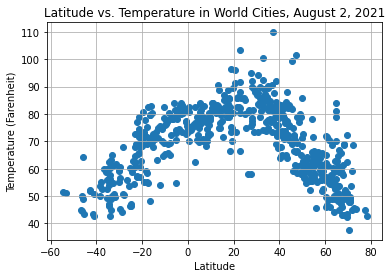

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("Latitude vs. Temperature in World Cities, August 2, 2021")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperaturevsLatitude.png")
plt.show()

## Latitude vs. Humidity Plot

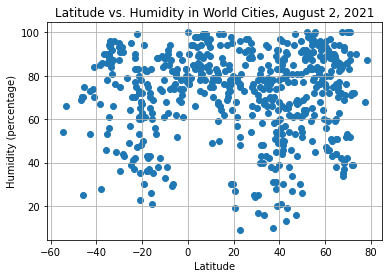

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("Latitude vs. Humidity in World Cities, August 2, 2021")
plt.ylabel("Humidity (percentage)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityvsLatitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

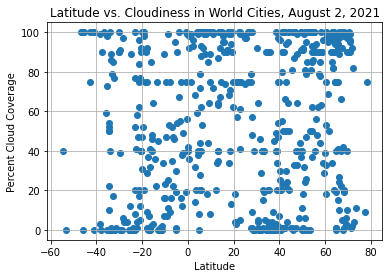

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("Latitude vs. Cloudiness in World Cities, August 2, 2021")
plt.ylabel("Percent Cloud Coverage")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityvsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

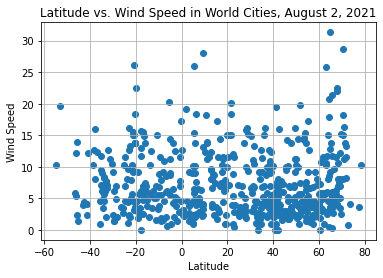

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("Latitude vs. Wind Speed in World Cities, August 2, 2021")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityvsWindSpeed.png")
plt.show()

## Linear Regression

In [16]:
# Create Northern Hemisphere dataframe
n_hemisphere_df = weather_data.loc[weather_data["Lat"] > 0]
print(n_hemisphere_df)

              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
2           Albany  42.6001  -73.9662     76.64        65         100   
6           Barrow  71.2906 -156.7887     53.62        71           1   
7    San Cristobal   7.7669  -72.2250     77.18        84          99   
8          Chapais  49.7834  -74.8492     71.38        54           0   
9          Qaanaaq  77.4840  -69.3632     45.09        68           9   
..             ...      ...       ...       ...       ...         ...   
560      Gorontalo   0.5412  123.0595     82.44        76          92   
561   Shelabolikha  53.4131   82.6167     60.26        88          50   
563       Ha Giang  22.8333  104.9833     82.26        76          61   
564        Wanxian  30.8039  108.3897     83.75        78           4   
565     Morant Bay  17.8815  -76.4093     85.62        83          99   

     Wind Speed Country        Date  
2          2.35      US  1628070667  
6         13.80      US  1628077383  
7        

In [17]:
# Create Southern Hemisphere dataframe
s_hemisphere_df = weather_data.loc[weather_data["Lat"] < 0]
print(s_hemisphere_df)

               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      Punta Arenas -53.1500  -70.9167     51.12        66           0   
1           Itarema  -2.9248  -39.9167     79.81        78          75   
3           Mataura -46.1927  168.8643     44.47        70         100   
4         Geraldton -28.7667  114.6000     44.13        93           0   
5         Cape Town -33.9258   18.4232     56.26        93           0   
..              ...      ...       ...       ...       ...         ...   
546           Opuwo -18.0607   13.8400     58.57        36           9   
553    Vangaindrano -23.3500   47.6000     64.49        83         100   
554           Rocha -34.4833  -54.3333     46.96        94          50   
556  Port Macquarie -31.4333  152.9167     61.90        45           1   
562          Tadine -21.5500  167.8833     73.38        60          62   

     Wind Speed Country        Date  
0         19.57      CL  1628079633  
1         12.55      BR  1628066751

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4609751445756172


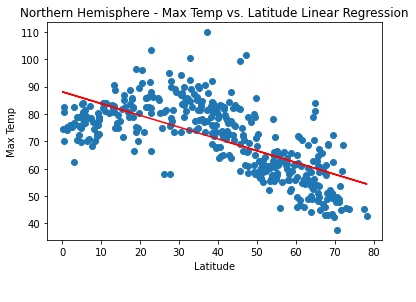

<Figure size 432x288 with 0 Axes>

In [18]:
# Scatterplot
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Max Temp']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
# plt.annotate('figure pixels', xy = (100,100), xycoords = 'figure pixels')

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHTempRegress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.60513189414393


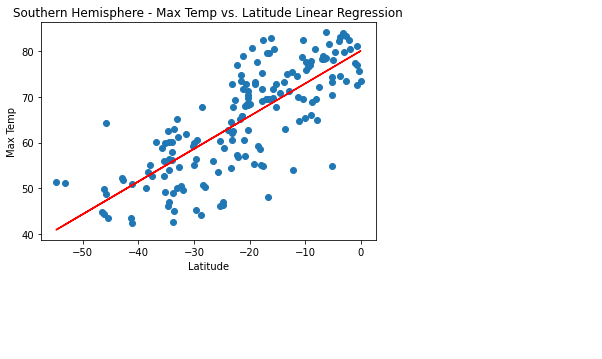

<Figure size 432x288 with 0 Axes>

In [19]:
# Scatterplot
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Max Temp']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHTempRegress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010664254493845159


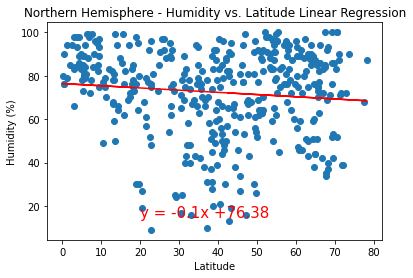

<Figure size 432x288 with 0 Axes>

In [20]:
# Scatterplot
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Humidity']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHHumidRegress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0001535265837676553


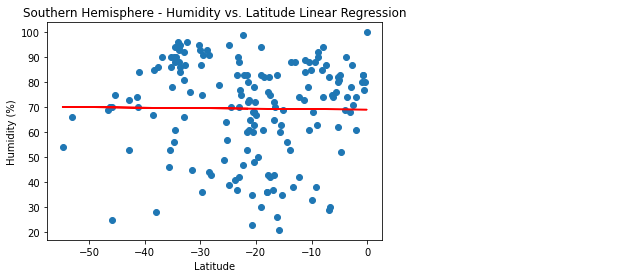

<Figure size 432x288 with 0 Axes>

In [21]:
# Scatterplot
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Humidity']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHHumidRegress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0005516308380735444


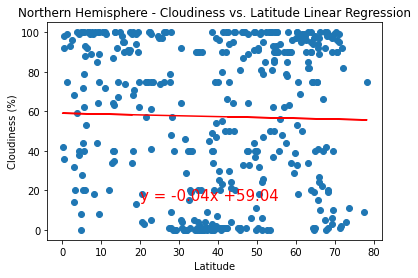

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Cloudiness']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHCloudRegress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.016870531672907255


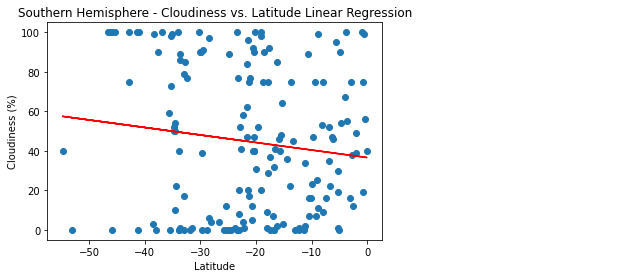

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Cloudiness']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHCloudRegress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.001886033197164248


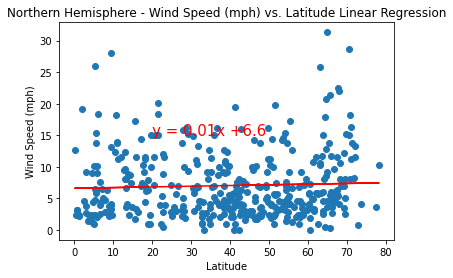

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Wind Speed']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHWindRegress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0014495023201128942


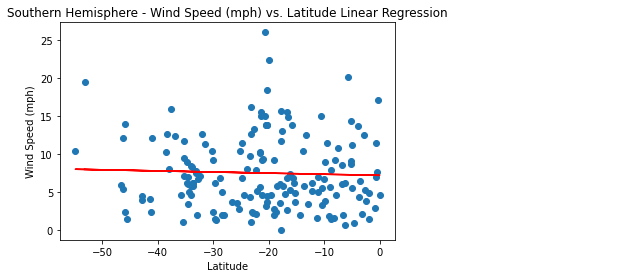

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Wind Speed']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHWindRegress.png")